Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Importing classes

In [2]:
#CMAB
from Strategies.CLinUCB import CLinUCB
from Strategies.CLUB import CLUB
from Strategies.LinUCB                    import LinUCB
from Strategies.LinUCBGlobal              import LinUCBGlobal
#Rewards
from Strategies.Rewards.BernoulliFeature   import BernoulliFeature

Init Parameters

In [3]:
iterations = 20000
experimentos = 100
k = 10
d = 2
alpha = 1
user_amount = 100
max_prob = 0.3
noise = 0.1
cluster_amount = 2
clusters_amounts = [1,2,4,6,8]
#aux = [0, -1]
#aux /= np.linalg.norm(aux)
best_theta = [[1, 0],[0,1]]
lamb = 1

sup_percentile = 75
inf_percentile = 25

Init

In [4]:
reward_class = BernoulliFeature(k, d,user_amount,cluster_amount, max_prob, noise, best_theta)

In [5]:
# Run experiments
linucb_regrets              = np.zeros((experimentos,iterations))
linucb_g_regrets              = np.zeros((experimentos,iterations))
linucb_cluster_regrets       = np.zeros((experimentos,iterations))
club_regrets       = np.zeros((experimentos,iterations))
# Run experiments
for i in    range(experimentos):
    print('exp: ' + str(i + 1) + '/' + str(experimentos))

    #club      = CLUB(k, iterations, reward_class, d, user_amount, alpha)
    linucb       = LinUCB(k, iterations, reward_class, d, user_amount, alpha )
    linucbg      = LinUCBGlobal(k, iterations, reward_class, d, user_amount, alpha )
    linucbk      = CLinUCB(k, iterations, reward_class, d, user_amount, alpha, clusters_amounts, lamb, 500, 100 )

    #club_regrets[i]           = club.run()
    linucb_cluster_regrets[i]           = linucbk.run()
    linucb_regrets[i]                   = linucb.run()
    linucb_g_regrets[i]                 = linucbg.run()


exp: 1/100
0/20000
1000/20000
2000/20000
3000/20000
4000/20000
5000/20000
6000/20000
7000/20000
8000/20000
9000/20000
10000/20000
11000/20000
12000/20000
13000/20000
14000/20000
15000/20000
16000/20000
17000/20000
18000/20000
19000/20000
0/20000
1000/20000
2000/20000
3000/20000
4000/20000
5000/20000
6000/20000
7000/20000
8000/20000
9000/20000
10000/20000
11000/20000
12000/20000
13000/20000
14000/20000
15000/20000
16000/20000
17000/20000
18000/20000
19000/20000
0/20000
1000/20000
2000/20000
3000/20000
4000/20000
5000/20000
6000/20000
7000/20000
8000/20000
9000/20000
10000/20000
11000/20000
12000/20000
13000/20000
14000/20000
15000/20000
16000/20000
17000/20000
18000/20000
19000/20000
exp: 2/100
0/20000
1000/20000
2000/20000
3000/20000
4000/20000
5000/20000
6000/20000
7000/20000
8000/20000
9000/20000
10000/20000
11000/20000
12000/20000
13000/20000
14000/20000
15000/20000
16000/20000
17000/20000
18000/20000
19000/20000
0/20000
1000/20000
2000/20000
3000/20000
4000/20000
5000/20000
6000/20

In [6]:
#linucb
linucb_inf            = np.percentile(linucb_regrets,inf_percentile ,axis=0)
linucb_median_rew     = np.median(linucb_regrets,axis=0)
linucb_sup            = np.percentile(linucb_regrets,sup_percentile ,axis=0)

linucb_g_inf            = np.percentile(linucb_g_regrets,inf_percentile ,axis=0)
linucb_g_median_rew     = np.median(linucb_g_regrets,axis=0)
linucb_g_sup            = np.percentile(linucb_g_regrets,sup_percentile ,axis=0)

linucb_c_inf            = np.percentile(linucb_cluster_regrets,inf_percentile ,axis=0)
linucb_c_median_rew     = np.median(linucb_cluster_regrets,axis=0)
linucb_c_sup            = np.percentile(linucb_cluster_regrets,sup_percentile ,axis=0)

#club
club_inf            = np.percentile(club_regrets,inf_percentile ,axis=0)
club_median_rew     = np.median(club_regrets,axis=0)
club_sup            = np.percentile(club_regrets,sup_percentile ,axis=0)

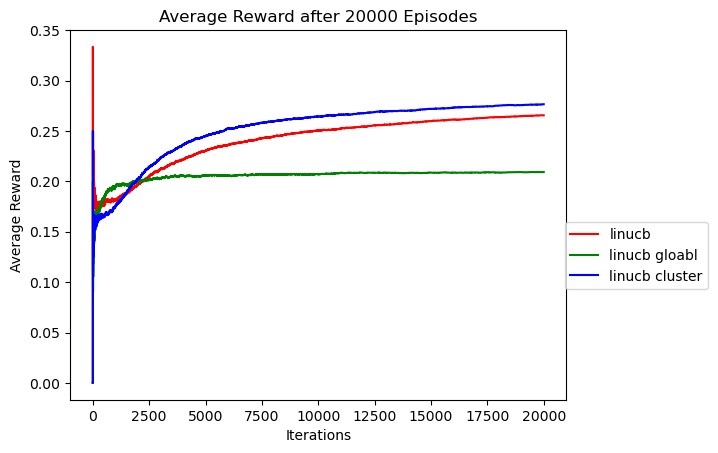

In [7]:
fig, ax = plt.subplots()

transparencia = 0.5

#linucb
plt.plot(linucb_median_rew,label="linucb", color='red')
plt.plot(linucb_g_median_rew,label="linucb gloabl", color='green')
plt.plot(linucb_c_median_rew,label="linucb cluster", color='blue')
#plt.plot(club_median_rew,label="club", color='black')

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Reward after " + str(iterations)
    + " Episodes")
#plt.ylim(0,0.1)
plt.show()


In [8]:
max_prob = np.zeros(user_amount)
for i in range(user_amount):
    max_prob[i] = np.max(reward_class.get_probabilities(i))
print(max_prob)
print(np.average(max_prob))

[0.29987608 0.29978003 0.29995776 0.29995003 0.29993739 0.29981837
 0.29990129 0.29980893 0.29998971 0.29981428 0.29996377 0.29984656
 0.29985395 0.29988589 0.29977734 0.29990757 0.29982569 0.29992885
 0.2999475  0.29985734 0.29986692 0.29960343 0.29988008 0.29991541
 0.29984809 0.29985271 0.29970381 0.29986236 0.29983034 0.29985419
 0.29991733 0.29990228 0.29985461 0.29976744 0.29994253 0.29985532
 0.2999882  0.29982758 0.29989542 0.29988325 0.29978927 0.29972224
 0.29988033 0.29966155 0.2998719  0.29995163 0.29998344 0.29968725
 0.29981284 0.29979614 0.29993666 0.29951465 0.29994635 0.29978251
 0.29983434 0.29989976 0.29984853 0.29976017 0.29985935 0.29991213
 0.29996785 0.29983884 0.29996457 0.29991923 0.29983754 0.29984779
 0.29982934 0.29991385 0.29991702 0.29995202 0.29991798 0.29980908
 0.29988216 0.29968889 0.2998842  0.29990591 0.29987956 0.29993627
 0.29986843 0.29986482 0.29995439 0.29990513 0.29994666 0.2999528
 0.29982883 0.29997232 0.29989855 0.29992329 0.29997968 0.29989

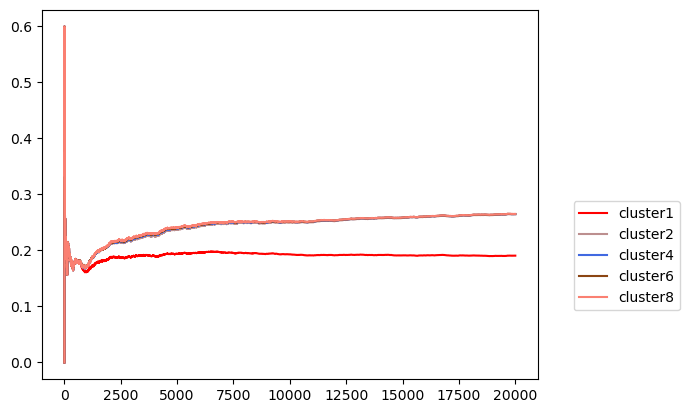

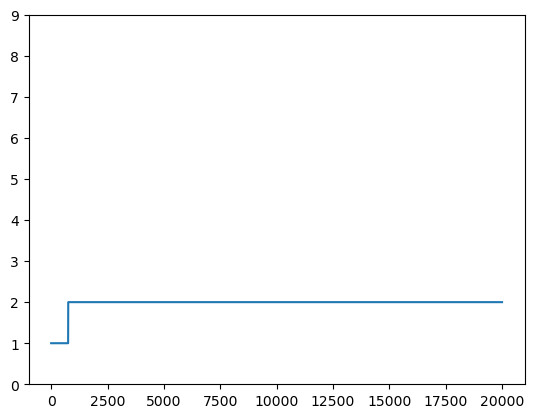

In [9]:
linucbk.get_rc().graph()

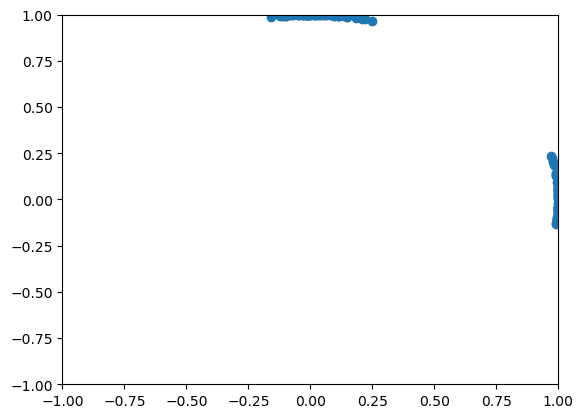

In [10]:
reward_class.graph()

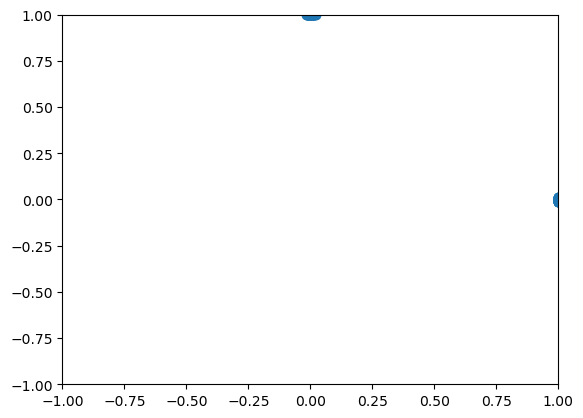

In [11]:
reward_class.graph_best()

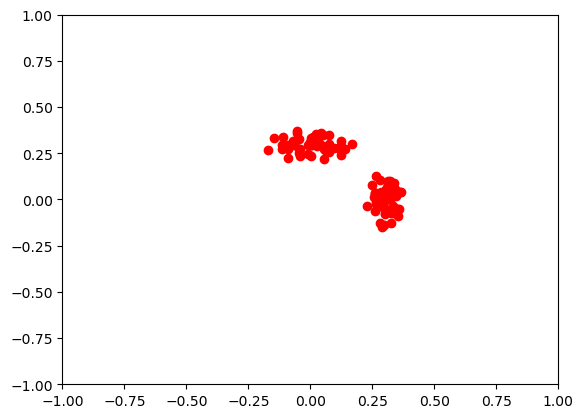

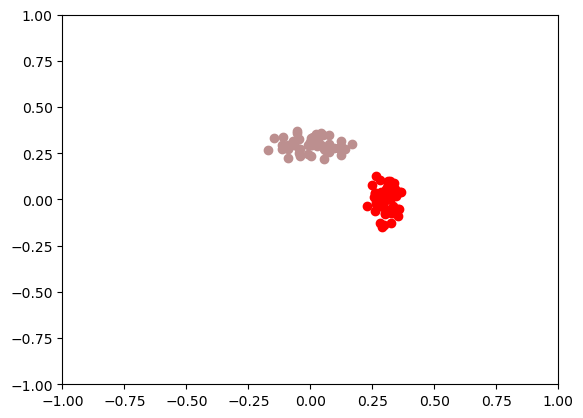

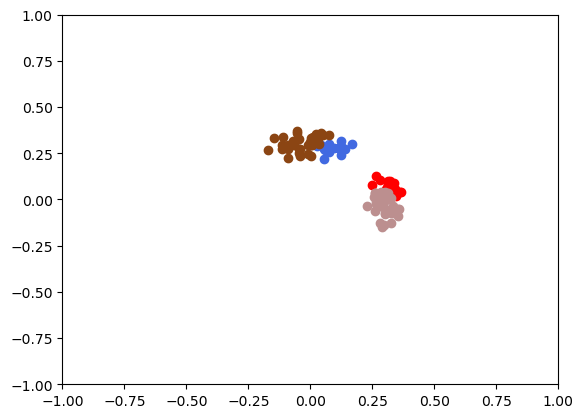

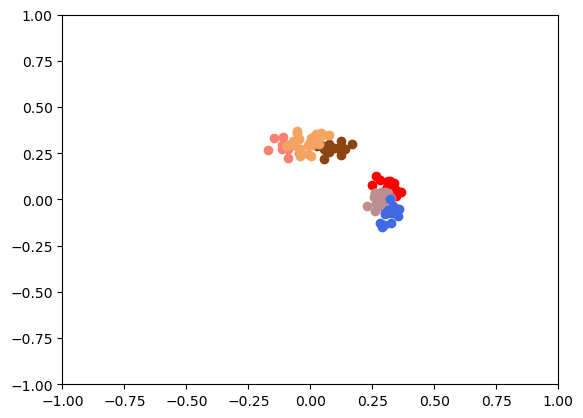

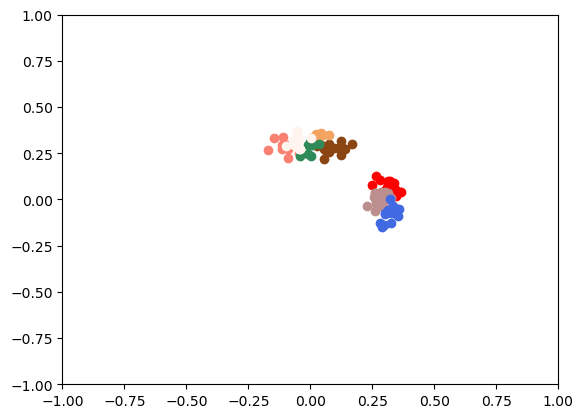

In [12]:
linucbk.get_model().graph()